In [1]:
import warnings
warnings.filterwarnings('ignore')


import pandas as pd
import numpy as np
from plotnine import *

from sklearn.preprocessing import StandardScaler #Z-score variables

from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

from sklearn.metrics import silhouette_score, silhouette_samples

%matplotlib inline

# K Means

## 1. Explore

## 2. Build Model

In [2]:
bk = pd.read_csv("https://raw.githubusercontent.com/cmparlettpelleriti/CPSC392ParlettPelleriti/master/Data/burger-king-items.txt",
                sep='\t')

bk.head()

,Item,Serving.size,Calories,Fat.Cal,Protein(g),Fat(g),Sat.Fat(g),Trans.fat(g),Chol(mg),Sodium(mg),Carbs(g),Fiber(g),Sugar(g),Meat,Breakfast,Not Breakfast,CarbsxMeat
0,Hamburger,109.0,260,90.0,13,10.0,4.0,0.0,35,490,28,1.0,6,1,0,1,28
1,Cheeseburger,121.0,300,130.0,16,14.0,6.0,0.0,45,710,28,1.0,6,1,0,1,28
2,Double_Hamburger,146.0,360,160.0,22,18.0,8.0,0.0,70,520,28,1.0,6,1,0,1,28
3,Double_Cheeseburger,171.0,450,230.0,26,26.0,12.0,1.0,95,960,29,1.0,6,1,0,1,29
4,Buck_Double,158.0,410,200.0,24,22.0,10.0,0.5,85,740,28,1.0,6,1,0,1,28


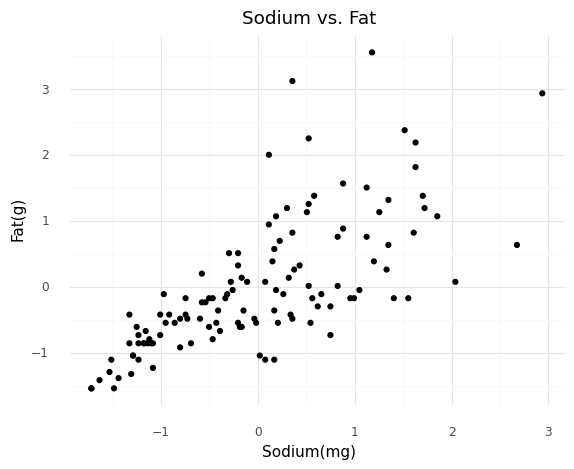

<ggplot: (8727316467161)>

In [3]:
# data
features = ["Fat(g)", "Sodium(mg)"]
X = bk[features]

# z
z = StandardScaler()
X[features] = z.fit_transform(X[features])


# plot
(ggplot(X, aes(x = "Sodium(mg)", y = "Fat(g)")) + geom_point() + 
 theme_minimal() + labs(title = "Sodium vs. Fat"))

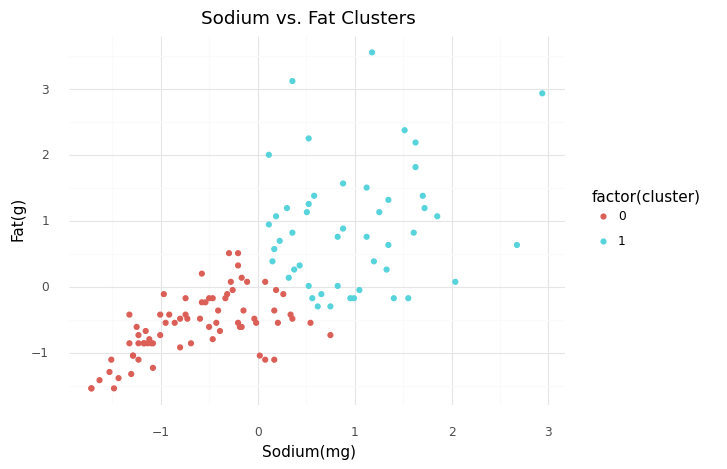

<ggplot: (8727316082837)>

In [5]:
# km
km = KMeans(n_clusters = 2)
km.fit(X[features])

# labels
membership = km.predict(X[features])

X["cluster"] = membership

# plot
(ggplot(X, aes(x = "Sodium(mg)", y = "Fat(g)", color = "factor(cluster)")) + geom_point() + 
 theme_minimal() + labs(title = "Sodium vs. Fat Clusters"))

## 3. Evaluate Model

In [6]:
# sil score
silhouette_score(X[features], membership)

0.4888133809282478

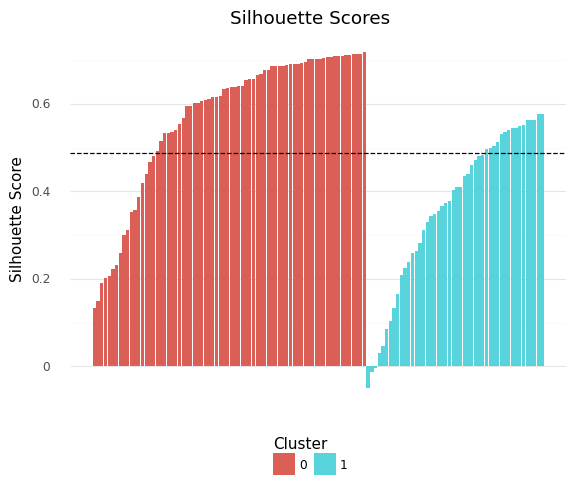

<ggplot: (8727310737533)>

In [7]:
# sil_points
sil_points = silhouette_samples(X[features], membership)

# add silhouette scores and clusters to X
X["sil"] = sil_points
X["cluster"] = membership

# sort X by cluster and silhouette score just to look better
X = X.sort_values(by = ["cluster", "sil"], ascending = True)

# number rows for graphing
X["number"] = range(0,X.shape[0])

(ggplot(X, aes(x = "number", y = "sil", fill = "factor(cluster)"))
+ geom_bar(stat = "identity") + 
 geom_hline(yintercept = np.mean(sil_points), linetype = "dashed") +
theme_minimal() + 
labs(x = "", y = "Silhouette Score", title = "Silhouette Scores") + 
theme(axis_text_x= element_blank(),
panel_grid_major_x= element_blank(),
panel_grid_minor_x= element_blank(),
legend_position= "bottom") +
scale_fill_discrete(name = "Cluster"))



# Another Example

In [10]:
features = ["Fat(g)", "Sodium(mg)", "Calories", "Chol(mg)",
            "Sugar(g)", "Protein(g)"]
X = bk[features]

z = StandardScaler()

X[features] = z.fit_transform(X[features])

# model
km = KMeans(n_clusters = 5)
km.fit(X[features])

membership = km.predict(X[features])

X["cluster"] = membership

print(silhouette_score(X[features], membership))

0.28495780856976133


In [11]:
# membership
membership

array([3, 1, 1, 1, 1, 1, 1, 0, 0, 0, 2, 2, 0, 0, 2, 2, 2, 2, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 3, 3, 3, 3, 1, 1, 3, 1, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 1, 3, 3, 3, 3, 1, 1, 3, 3, 1, 1, 3, 1, 1, 3, 3, 0, 1, 3, 2,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 4, 4, 3,
       3, 3, 1, 1, 4, 4, 3, 3, 4, 4, 0, 0, 0, 1, 0, 0, 0, 1, 1, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 3, 4, 4, 4, 4], dtype=int32)

## Choosing K

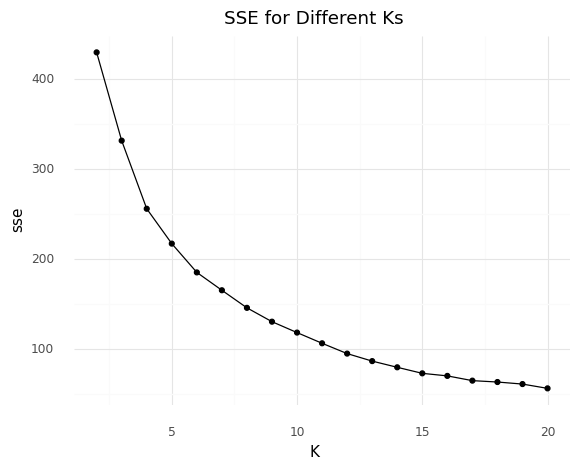

<ggplot: (8727310642597)>

In [14]:
ks = [2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]

sse =  []
sil = []

for k in ks:
  km = KMeans(n_clusters = k)
  km.fit(X[features])

  sse.append(km.inertia_)
  sil.append(silhouette_score(X[features], km.predict(X[features])))

sse_df = pd.DataFrame({"K": ks,
                       "sse": sse,
                       "silhouette": sil})

(ggplot(sse_df, aes(x = "K", y = "sse")) + 
 geom_line() + geom_point() +
 theme_minimal() + 
 labs(title = "SSE for Different Ks"))

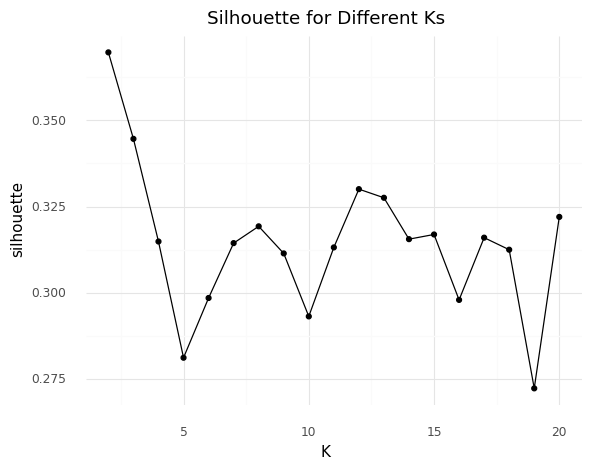

<ggplot: (8727316393177)>

In [15]:
# sil
(ggplot(sse_df, aes(x = "K", y = "silhouette")) + 
 geom_line() + geom_point() +
 theme_minimal() + 
 labs(title = "Silhouette for Different Ks"))

# Another Another Example
Data from [here](https://www.kaggle.com/josephvm/major-league-soccer-dataset/version/51?select=all_players.csv).

In [16]:
d = "https://raw.githubusercontent.com/cmparlettpelleriti/CPSC392ParlettPelleriti/master/Data/all_players.csv"
mls = pd.read_csv(d)
mls.head()

,Player,Club,POS,GP,GS,MINS,G,A,SHTS,SOG,...,RdA,A/90min,FC,FS,OFF,YC,RC,SOG%,Year,Season
0,Roy Lassiter,TB,F,30,30,2580,27,4,76,49,...,2,0.14,20,39,70,2,0,64.47,1996,reg
1,Raul Diaz Arce,DC,F,28,28,2351,23,2,100,49,...,2,0.08,32,26,35,6,1,49.00,1996,reg
2,Eduardo Hurtado,LA,F,26,26,2323,21,7,87,56,...,3,0.27,48,26,25,5,0,64.37,1996,reg
3,Preki,KC,M,32,32,2880,18,13,140,61,...,4,0.41,26,44,7,3,0,43.57,1996,reg
4,Brian McBride,CLB,F,28,28,2307,17,3,79,44,...,1,0.12,21,46,10,0,0,55.70,1996,reg


In [17]:
mls2018 = mls.loc[mls.Year == 2018,]
mls2018.shape

(829, 28)

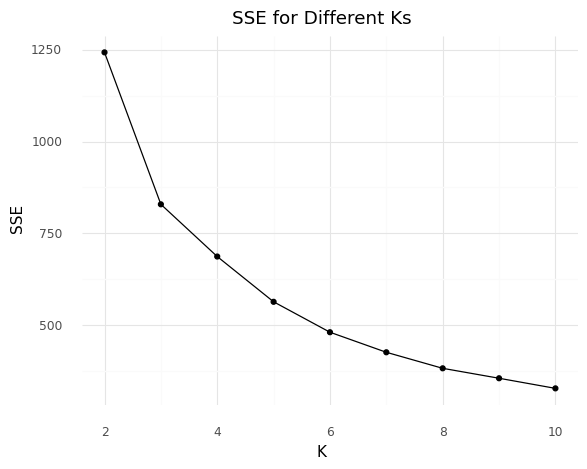

<ggplot: (8727316054117)>

In [18]:
pred = ["G", "A", "FC"]
X = mls2018[pred]

z = StandardScaler()

X[pred] = z.fit_transform(X)

ks = [2,3,4,5,6,7,8,9,10]
sse = []
sils = []

for k in ks:
  km = KMeans(n_clusters = k)
  km.fit(X[pred])

  sse.append(km.inertia_)
  sils.append(silhouette_score(X[pred], km.predict(X[pred])))

sse_df = pd.DataFrame({"K": ks, "SSE": sse, "Silhouette": sils})
(ggplot(sse_df, aes(x = "K", y = "SSE")) + geom_point() + geom_line() + theme_minimal() +
labs(title = "SSE for Different Ks"))


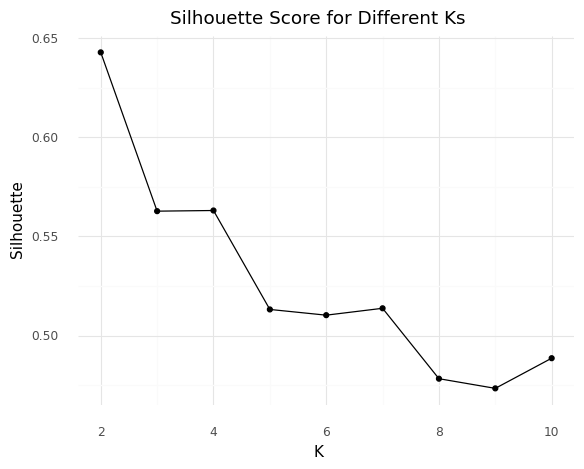

<ggplot: (8727310192169)>

In [19]:
(ggplot(sse_df, aes(x = "K", y = "Silhouette")) + geom_point() + 
geom_line() + 
theme_minimal() + 
labs(title = "Silhouette Score for Different Ks"))

In [20]:
# km model
km = KMeans(n_clusters = 4)
km.fit(X[pred])

mls2018["cluster"] = km.predict(X[pred])
mls2018.head()

,Player,Club,POS,GP,GS,MINS,G,A,SHTS,SOG,...,A/90min,FC,FS,OFF,YC,RC,SOG%,Year,Season,cluster
8337,Josef Martinez,ATL,F,34,34,2898,31,6,97,56,...,0.19,24,31,35,1,0,57.73,2018,reg,2
8338,Zlatan Ibrahimovic,LA,F,27,24,2143,22,10,116,49,...,0.42,36,34,27,5,1,42.24,2018,reg,2
8339,Bradley Wright-Phillips,LAFC,F,32,28,2536,20,8,82,37,...,0.28,32,55,31,7,0,45.12,2018,reg,2
8340,Mauro Manotas,HOU,F,33,30,2633,19,1,95,43,...,0.03,24,20,23,1,0,45.26,2018,reg,2
8341,Gyasi Zardes,CLB,F,33,33,2948,19,0,88,40,...,0.00,27,33,20,3,0,45.45,2018,reg,2


## Summarize Clusters


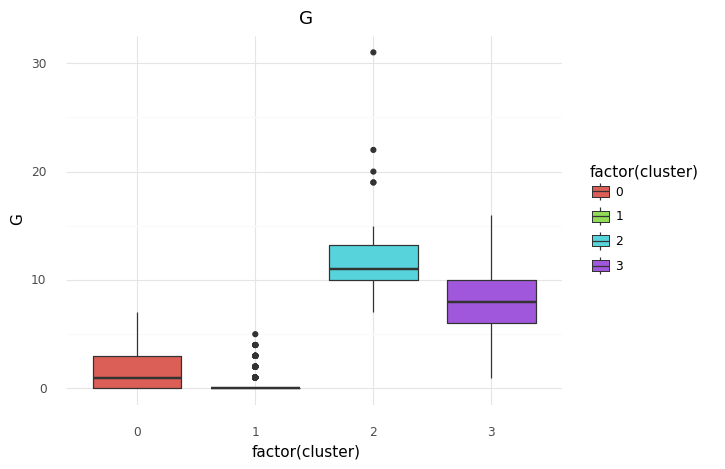

<ggplot: (8727310272489)>


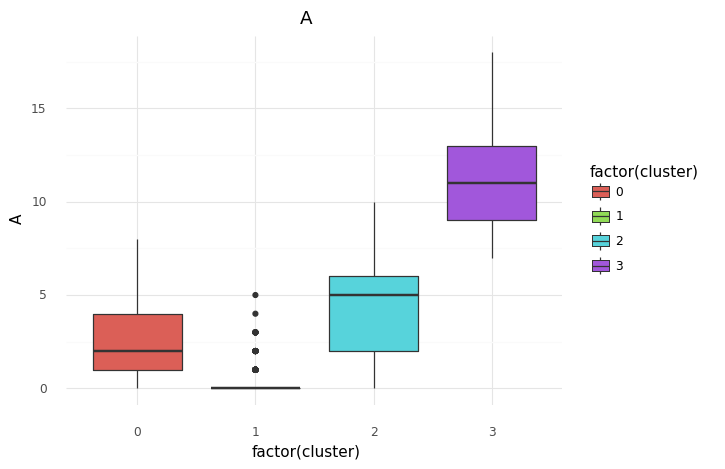

<ggplot: (8727308009925)>


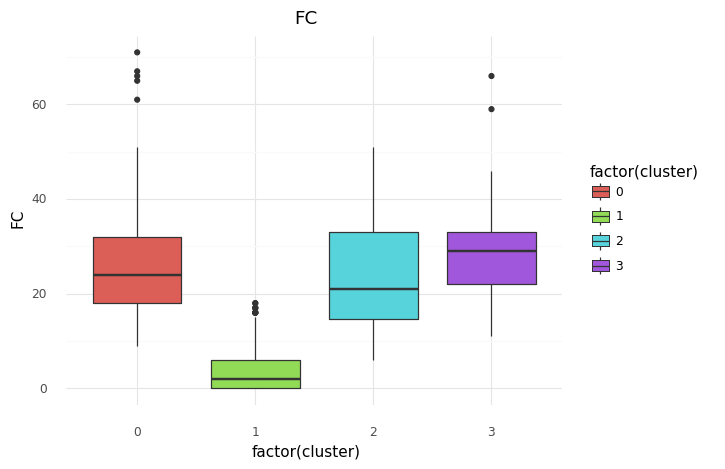

<ggplot: (8727308053189)>


In [26]:
for p in pred:
    print(ggplot(mls2018, aes(x = "factor(cluster)", y = p,
                             fill = "factor(cluster)")) +
         geom_boxplot() + theme_minimal() + 
         labs(title = p))

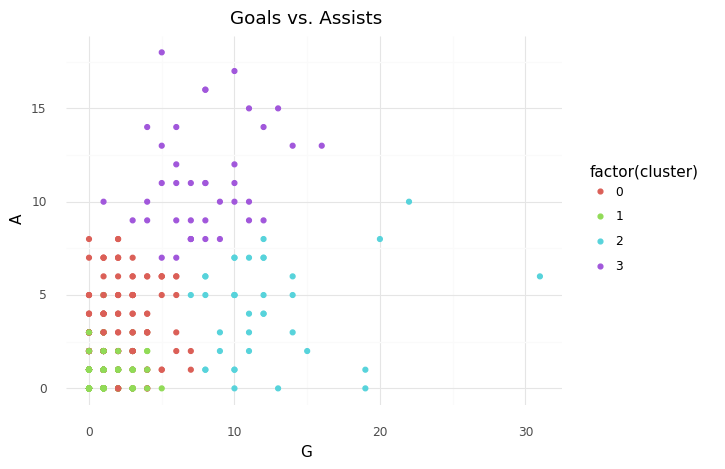

<ggplot: (8727316406649)>

In [27]:
(ggplot(mls2018, aes(x = "G", y = "A", color = "factor(cluster)")) + 
geom_point() + theme_minimal() + labs(x = "G", y = "A", title = "Goals vs. Assists"))

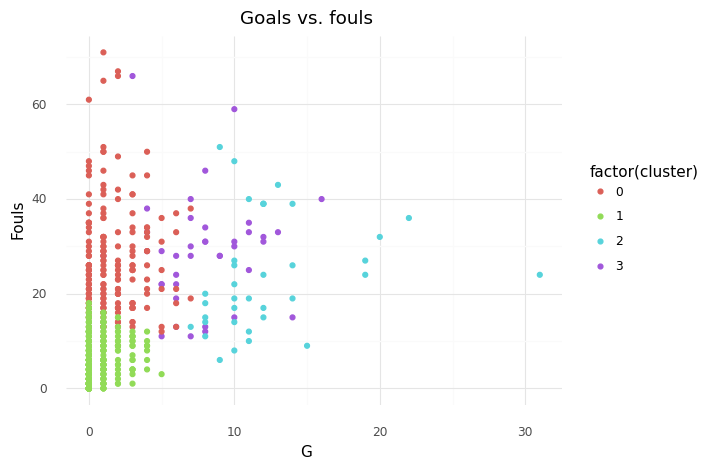

<ggplot: (8727307689637)>

In [28]:
(ggplot(mls2018, aes(x = "G", y = "FC", color = "factor(cluster)")) + 
geom_point() + theme_minimal() + labs(x = "G", y = "Fouls", title = "Goals vs. fouls"))

In [29]:
mls2018.groupby("cluster").mean()[["G", "A", "FC"]]

,G,A,FC
cluster,,,
0,1.592965,2.477387,26.532663
1,0.347748,0.300901,3.861261
2,12.277778,4.222222,23.944444
3,7.871795,11.153846,29.000000


In [44]:
mls2018.loc[mls2018.cluster == 1,"Player"].sample(10)

8823            Sam Cronin
8882        Jordan McCrary
8917          Axel Sjöberg
14254          Graham Zusi
8902           James Sands
8797         Anatole Abang
14088    Milton Valenzuela
14242      Jonathan Mensah
14068          Eric Remedi
14239      Gustav Svensson
Name: Player, dtype: object

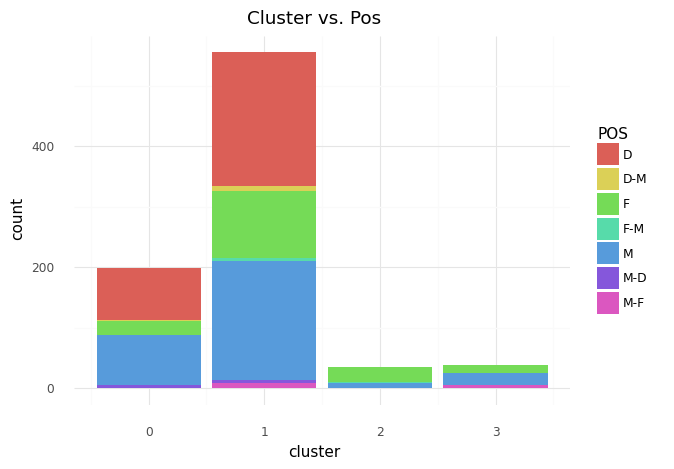

<ggplot: (8727308056749)>

In [45]:
(ggplot(mls2018, aes(x = "cluster", fill = "POS")) + geom_bar() + theme_minimal() + labs(title = "Cluster vs. Pos"))

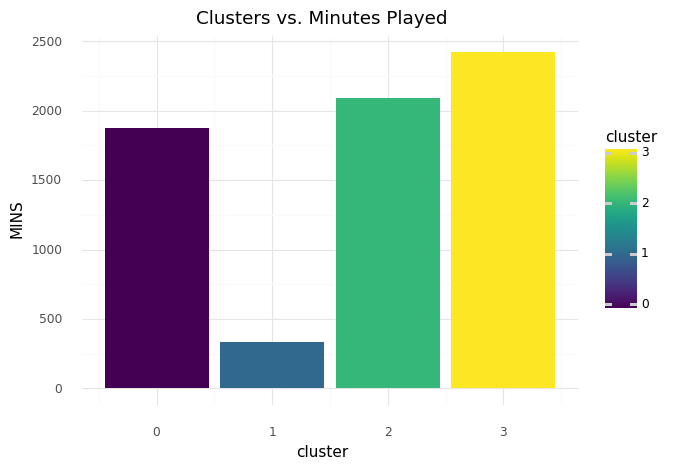

<ggplot: (8727307575613)>

In [46]:
(ggplot(mls2018, aes(x = "cluster", y = "MINS", fill = "cluster")) +
 stat_summary(fun_data = "mean_sdl", geom = "bar") +
theme_minimal() + labs(title = "Clusters vs. Minutes Played"))